# Project: Analyzing Profit of different Movies from the TMDb Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Project Limitation</a></li>    
</ul>

<a id='intro'></a>
## Introduction

Have you ever wondered what makes a movie a block buster and preform well intenational?. Does the sucess of movies depend on the skills of the cast or the director?. What is the most popular movie production company and why do these companies wrap up millions even billions of dollars every year in revenue?.
In this project we would be analyzing different movies realeased within 1960 to 2015, and try to find the key features that makes these movies successful.
This data set contains information of about 10,000 movies collected from The Movie Database (TMDb),including user ratings,release year, production companies, budget and revenue.

In [1]:
# Importing neccessary packages for the data analysis project
import numpy as np
import pandas as pd
# Importing neccessary packages for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
sns.set_theme(style="darkgrid")

In [2]:
# Displays the maximum columns in the dataframe
pd.set_option('display.max_columns', 30)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Loading in the dataset for the project
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# Returns a tuple of the dimension of the dataset
df.shape

(10866, 21)

The movies data set has 10,866 movies and 21 features for analysis.

In [5]:
# Returns the sum of all NAN values in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Notice**: The output of our code `df.isnull().sum()` contains some missing values. The decision to drop or trim such columns is based on the area of research of this project.
The project would be focusing majorly on the financial aspect of movie production. Therefore columns contain missing values might still be used for our analysis.
Let's discuss the columns containing missing values and columns that would be droped:
+ **imdb_id**: Contains 10 missing values.
+ **cast**: Contains 76 missing values. cast would not be analizied in this project.
+ **homepage**: Contains 7930 missing values.About 72 percent of this column contains missing data, this might be because movie producers do not have web pages for there movies, or it is irrelevant. The homepage column would be droped.
+ **director**: Contains 44 missing values. This might be because of cost of production, we would be investigated later.
+ **tagline**: Contains 2824 missing values. For this project i have decided not to work with this column, so it would be dropped.
+ **keywords**: Contains 1493 missing values. The values contain missing values would not be dropped.
+ **overview**: This column would be droped but might be reference later in the project
+ **genres**: Contains 43 missing values which would be drop during analysis.
+ **production_companies**: Contains 1030 missing values, This would be investigated later.


### Creating a Duplicate  of the DataFrame `df` called `movie_df` on which Data Cleanig would be performed.

In [6]:
# Creating a copy of our dataset for cleaning
movies_df = df.copy()
movies_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Drop Columns and Missing Values from the data set

As discussed earlier column that would not be used for analysis would be removed from our data set `movies_df`.

In [7]:
# Droping columns that would not be used in the analysis
movies_df.drop(labels = ['cast','homepage', 'tagline','overview','vote_count'], axis = 1, inplace = True)

In [8]:
# Droping NAN values within some columns in the data set
movies_df.dropna(subset = ['imdb_id','director','genres'], inplace = True)

In [9]:
movies_df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                   0
keywords                1447
runtime                    0
genres                     0
production_companies     991
release_date               0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

You'll notice that the missing data in keywords and production companies were not removed. This is because we made an assumption that movies without directors and production companies tend to have lower budget than those that have.

In [10]:
movies_df.shape

(10796, 16)

We are now left with 10,796 movies and 16 features to work with.

### Checking for Duplicate Rows

In [11]:
# Checks for duplicates in the data set
(movies_df.duplicated()).value_counts()

False    10795
True         1
dtype: int64

From the code above notice that we have 1 duplicated movie. To find out which movie this is a filter is created with variable name `duplicate_filt` which take in a series of boolean values, if the boolean value is True it would return that row containing the duplicate movie. 

In [12]:
# Created a filter that returns the duplicate row
duplicate_filt = movies_df.duplicated()
movies_df[duplicate_filt]

,id,imdb_id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,5.0,2010,30000000.0,967000.0


In [13]:
# Return the duplicated rows in the data set
movies_df.query('(id == 42194) & (imdb_id == "tt0411951")')

,id,imdb_id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,5.0,2010,30000000.0,967000.0


To observe the duplicate movies the id and imdb id were taken and a query is passed return the movies that were duplicated.
The movie **Tekken** has Duplicate rows in the dataset with an index of 2089 and 2090. 

### Cleaning Duplicated Rows

We just observed that the movie Tekken has duplicate rows to drop one of these movies we would passed a pandas function called `drop_duplicates(inplace = True)` and check if any duplicates still remain.

In [14]:
# Removes the duplicated rows
movies_df.drop_duplicates(inplace = True)
movies_df.duplicated().any() 

False

### Data Type Formating

In [15]:
# Returns the data type of each column
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The column `movies_df['release_date']` is formated as Object type. This column would be converted to a date time data format.

In [16]:
# formating release date form Object type to Date time formate
movies_df['release_date'] = pd.to_datetime(df.release_date)

In [17]:
movies_df.release_date.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### Statistical Summary

In [18]:
# Returns a statistical summary of our data set
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10795.000000,10795.000000,1.079500e+04,1.079500e+04,10795.000000,10795.000000,10795.000000,1.079500e+04,1.079500e+04
mean,65560.482446,0.649617,1.471795e+07,4.008413e+07,102.214266,5.970394,2001.285966,1.766255e+07,5.170107e+07
std,91751.943252,1.002631,3.099232e+07,1.173433e+08,30.764036,0.932914,12.821353,3.438989e+07,1.450475e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10568.000000,0.209190,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20453.000000,0.385492,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74684.000000,0.717850,1.588747e+07,2.461915e+07,112.000000,6.600000,2011.000000,2.103337e+07,3.409994e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


 **From the summary statistics  i noticed that the columns:**
 + Budget 
 + Revenue
 + and Runtime.
 
 
 **All of these columns have a minimun value of 0 which is an error since no movies can have:**
 
 + Zero Budget and Zero Revenue at once.
 + And Zero runtime.
 

From [Wikipedia](https://en.wikipedia.org/wiki/Feature_film) Most feature films are between 75 and 210 minutes long,and  [short films](https://en.wikipedia.org/wiki/Short_film) is any motion picture that is short enough in running time not to be considered a feature film.The Academy of Motion Picture Arts and Sciences defines a short film as "an original motion picture that has a running time of 40 minutes or less". But from our statistical summary the minimum runtime value is 0 minutes and the 25 percentile has a value of 90 minutes.

In [19]:
movies_df.runtime.describe()

count    10795.000000
mean       102.214266
std         30.764036
min          0.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [20]:
# checking for the number of rows with a runtime of zero
movies_df.query('runtime == 0').shape[0]

28

The code above shows that we have 28 movies that have 0 runtime. 

### Removing Movies with Zero Runtime 

In [21]:
# Returns only movies with runtime above 0 minutes
movies_df = movies_df.query('runtime != 0')

### Checking for Rows with Zero Budget and Zero Revenue in `movies_df`

It is unusual to have movies that allocated zero budget at the same time made zero revenue in return. First let check out the number of movies that had both zero revenue and budget at the same time.

In [22]:
movies_df.query('(budget == 0) & (revenue == 0)').shape[0]

4612

In [23]:
movies_df.query('(budget_adj == 0) & (revenue_adj == 0)').shape[0]

4612

Notice that there are 4612 rows where budget and revenue are equal to Zero. We would be removing these rows because we can not just replace budget and revenue with mean, median, or mode values since we are dealing with money. As seen in the summary statistics these columns have a wide range of minimum to maximum values for each movie.
If my aim is to find profitable movies and there relationship with other features, these cannot be used in my data set.

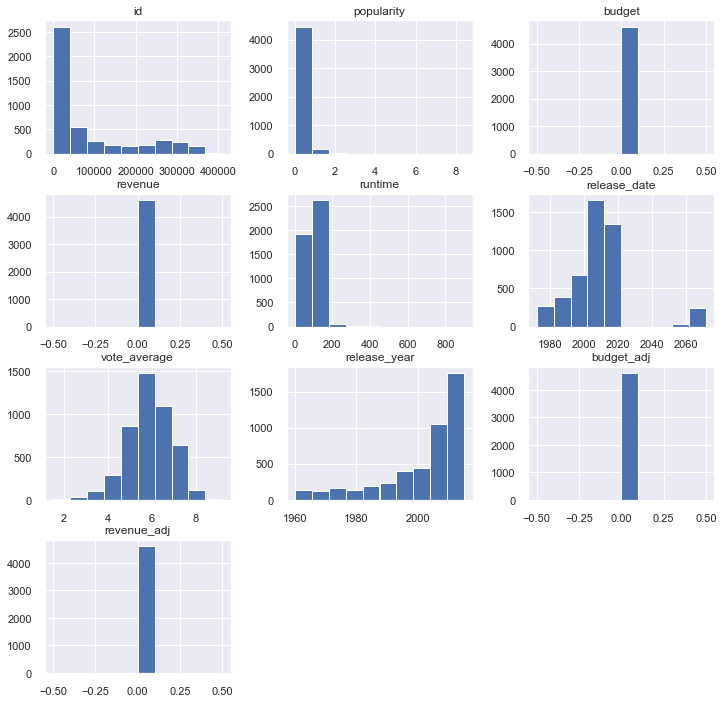

In [24]:
movies_df.query('(budget == 0) & (revenue == 0)').hist(figsize = (12, 12));

As you can see in the distribution plot for budget, revenue, adjusted budget, and adjusted revenue are all zero. The focus of this project is aimed at finding the relationship between profit and other features.

### Removing Rows with Zero Budget and Zero Revenue from `movies_df`

To remove movies with zero budget and also with zero revenue, we pass in a query that returns only movies that do not have zero budget, and zero revenue.Therefore if both conditions are meet it returns the row containing the movie.

In [25]:
movies_df = movies_df.query('(budget != 0) & (revenue != 0)')
movies_df.shape

(3853, 16)

Wow!, we are now left with only 3853 movies and 16 features to work with.

## Feature Engineering

To perform further analysis on our data set, especailly finding financial insight in our dataset a new column is created by subtacting budget from revenue in order to attain the profit of each movie.

In [26]:
# Creating a new column called profit
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
movies_df[['revenue', 'budget','profit']][:5]

,revenue,budget,profit
0,1513528810,150000000,1363528810
1,378436354,150000000,228436354
2,295238201,110000000,185238201
3,2068178225,200000000,1868178225
4,1506249360,190000000,1316249360


In [27]:
# Creating a new column called profit_adj
movies_df['profit_adj'] = movies_df['revenue_adj']- movies_df['budget_adj']
movies_df[['revenue_adj', 'budget_adj', 'profit_adj']][:5]

,revenue_adj,budget_adj,profit_adj
0,1.392446e+09,1.379999e+08,1.254446e+09
1,3.481613e+08,1.379999e+08,2.101614e+08
2,2.716190e+08,1.012000e+08,1.704191e+08
3,1.902723e+09,1.839999e+08,1.718723e+09
4,1.385749e+09,1.747999e+08,1.210949e+09


### Creating Runtime classes
The run time in minutes are grouped into classes.
- Runtime ranging from 2 to 40 are grouped as short runtime movies.
- Runtime ranging from 40 to 210 are grouped as moderate runtime movies.
- Runtime ranging from 210 to 877 are grouped as long runtime movies.

In [28]:
# Creating classes for each runtime range
runtime_bins = [2, 40, 210, 877]
runtime_labels = ['short_runtime','moderate_runtime','long_runtime']
movies_df['runtime_class'] = pd.cut(movies_df.runtime, right = False, bins = runtime_bins, labels =runtime_labels)

In [29]:
movies_df.runtime_class.unique()

['moderate_runtime', 'long_runtime', 'short_runtime']
Categories (3, object): ['short_runtime' < 'moderate_runtime' < 'long_runtime']

### Creating Profit classes

To simplify our analysis profit classes are created.
- Profit percentile ranging from 0 to 25 (low profit).
- Profit percentile ranging from 25 to 50 (medium low profit).
- Profit percentile ranging from 50 to 75 (medium high profit).
- Profit percentile ranging from 75 to 100 (high profit).

In [30]:
# Creating Profit classes
movies_df.profit.describe()
profit_bins = [-4.139124e+08, -1.175566e+06, 2.047278e+07, 8.346128e+07, 2.544506e+09 ]
profit_labels = ['low profit', 'medium low profit', 'medium high profit', 'high profit']
movies_df['profit_class'] = pd.cut(movies_df.profit, right = False, bins = profit_bins, labels = profit_labels)

<a id='eda'></a>
## Exploratory Data Analysis



### Ploting the Distribution of `movies_df`

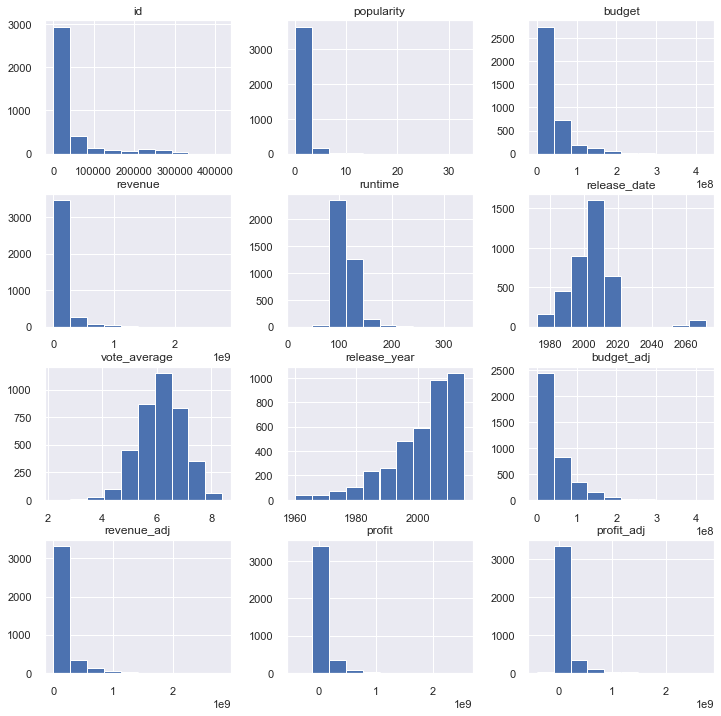

In [31]:
movies_df.hist(figsize = (12, 12));

From the distribution we can see that:
+ **Release year** is left skewed and 2015 has the highest number of movies.
+ **Runtime** is right skewed and majority of the movies has runtime ranging from 100 to 120 minutes.
+ **Release** has movies released in 2060 which is usuall since the release year ranges from 1960 to 2015.
+ **Popularity** majority of the movies have an popularity below 10.
+ **Profit** is right skewed and majority of movies a below a billion in value
+ **Budget** is right skewed with majority of movies budget been below 100 million in value.
+ **Revenue** is also right skewed and majority of movies revenue is below a billion in value.
+ **vote average** is slight left skewed.

#### During Data Wrangling we posed a question if movies without production companies had low budget and also made low revenue.

 To answer this question the budget of movies with and without production companies needs to be compared.
 - To do this we create a user defined function that takes in 3 arguments.
     1. `data`: The dataframe to be processed.
     2. `col_name1`: The column that contains the null values within itself.
     3. `col_name2`: The column we are using to compare the null or not null values.
 - Then we create a filter `data[col_name1].isnull()` for movies without production companies, and `data[col_name1].notnull()` for movies with production companies.
 - Then using bracket notation we return a series contain the `col_name2`, using the code `data[notnull][col_name2]` and `data[isnull][col_name2]`.
 - A histogram plot is then created using `title1` and `title2`. 

In [32]:
def data_null(data, col_name1, col_name2):
    """ Creates a histogram plot for comparing columns having null values with other specified columns"""
    isnull = data[col_name1].isnull()
    notnull = data[col_name1].notnull()
    title1 = col_name1.replace('_', ' ').title()
    title2 = col_name2.title()
    title = 'Comparing the {1} Distribution between  {0} with and without missing values'.format(title1, title2)
    plt.hist(data[notnull][col_name2], alpha = 0.5, color = 'g', label = 'not null')
    plt.hist(data[isnull][col_name2], color = 'r', label = 'null')
    plt.title(title)
    plt.xlabel(title2)
    plt.ylabel('Count')
    plt.grid(True)
    plt.legend()
    plt.show()
    ax = plt.show()
    return ax

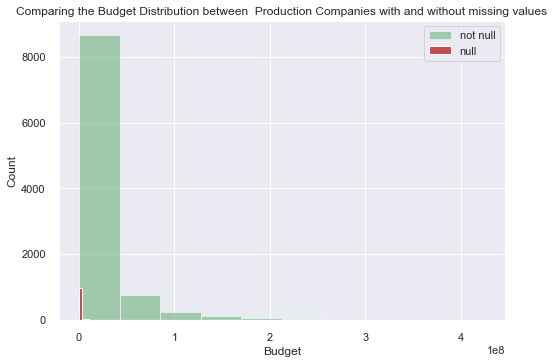

In [33]:
# Returns a Visualization of movies with and with out production companies and there relative budget.
data_null(df,'production_companies', 'budget')

From the plot you can notice that movies with null values have zero budget compared to movies that have production companies.

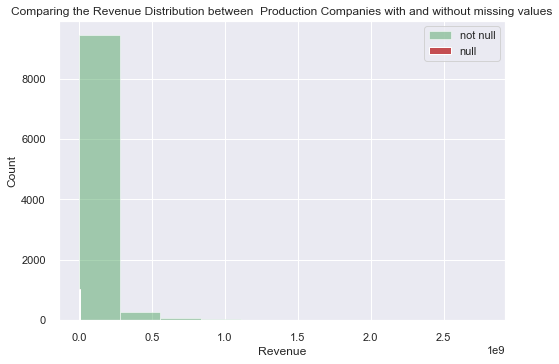

In [34]:
# Returns a Visualization of movies with and with out production companies and there relative revenue.
data_null(df,'production_companies', 'revenue')

#### Report
From the plot you can notice that movies with null values have zero budget compared to movies that had production companies.
From the two distribution plot we can see that our assumptions were correct, that movies with no production company had little budget.

#### During Data Wrangling we posed a question if movies without directors had low budget and also made low revenue.

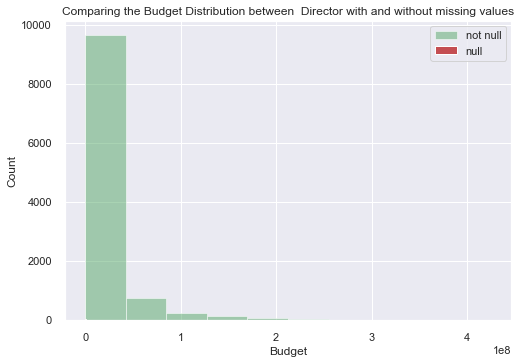

In [35]:
# Returns a Visualization of movies with and with out directors and there relative budget.
data_null(df,'director', 'budget')

From the distribution visualization we can see that movies without directors have zero budget compared to movies with direcotrs having a wide range of budget.

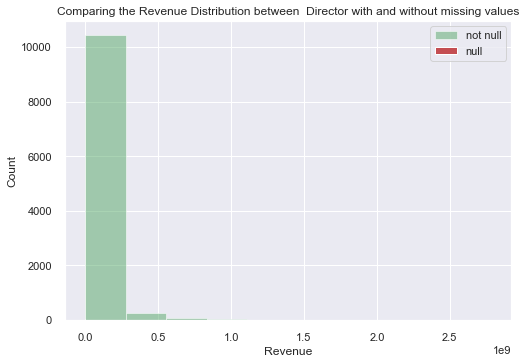

In [36]:
# Returns a Visualization of movies with and with out directors and there relative revenue.
data_null(df,'director', 'revenue')

#### Report
From the two distribution plot we can see that our assumptions were correct, that movies with no directors had little budget and revenue.

### Research Question 1 
#### Which genres are most popular?

Genre groups movies into classes based on the style in which the movie was performed. I like watching funny movies and sometimes Science Fiction. This is important because not everyone finds one style of performance entertaining or intresting. Production Companies would want to focus on movies that appeal to the wider audience, than those that are unique in order to maximize profit.

In [37]:
# First 10 row in the data set
movies_df.genres[:10]

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
5             Western|Drama|Adventure|Thriller
6    Science Fiction|Action|Thriller|Adventure
7              Drama|Adventure|Science Fiction
8            Family|Animation|Adventure|Comedy
9                      Comedy|Animation|Family
Name: genres, dtype: object

In [38]:
def filt_na(dataframe, column):
    """Removes the NAN values from a specified column"""
    df = dataframe[column].dropna()
    return df

def col_dic(dataframe,column):
    """Creates a dictionary containing the count of every unique valuemof the selected column
    INPUT:
    dataframe: A variable containing a pandas dataframe
    column: str. Specified column in the dataframe
    """
    genres_dic = {}
    for genre in filt_na(dataframe, column):
        # Split the string by "|" into individual string
        genre = genre.split('|')
        # Takes in only uniques string within the genre variable
        genre = set(genre)
        # Converts the set to a list
        genre = list(genre)
        for item in genre:
            # if genre is not in the dictionary store it and initialize it with 1.
            if item not in genres_dic:
                genres_dic[item] = 1
            # if genre is already in the dictionary update the value by adding 1
            else:
                genres_dic[item] += 1
    return genres_dic

def col_list(dataframe,column):
    """ Converts a dictionary into a list"""
    genres_list = []
    column_dic = col_dic(dataframe,column)
    for  k, v in column_dic.items():
        genres_list.append([k, v])
    return genres_list
def sorted_df(dataframe, column, ascending = True, column2 = 'count'):
    """ Sorts a Data Frame in order of increasing to decrease value or vice versa"""
    data = col_list(dataframe,column)
    df_col = pd.DataFrame(data, columns = [column, column2])
    df_col = df_col.sort_values(by = [column2],ascending= ascending,ignore_index= True)
    return df_col

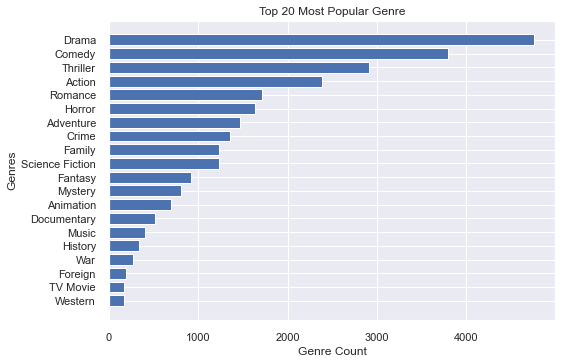

In [39]:
# genarates a list which is then plotted by the columns name and number of occurance
pop_genre = sorted_df(df, 'genres')
plt.barh(pop_genre['genres'], pop_genre['count'])

plt.title('Top 20 Most Popular Genre')
plt.ylabel('Genres')
plt.xlabel('Genre Count')
plt.grid(True)
plt.show()

#### Report
From the visualization above we see that movies genre:
+ Drama
+ Comedy
+ Thriller
+ and Action 

Are the most popular genres in our original data set `df`.
And movies like:
- Music.
- History.
- War.
- Foreign.
- TV movies.
- Western.
Are least popular in the dataset. Which might mean that these movies is enjoyed by a smaller audience than the popular movies.

### Research Question 2
#### What are the most popular key words used in movies?

From [IMDB](https://help.imdb.com/article/contribution/titles/keywords/GXQ22G5Y72TH8MJ5?ref_=helpms_helpart_inline#) Keyword for movies can be defined as
>  A word (or group of connected words) attached to a title (movie / TV series / TV episode) to describe any notable object, concept, style or action that takes place during a title. The main purpose of keywords is to allow visitors to easily search and discover titles.

If keywords allows users/viewers to easily search for movies and discover new ones what the most popular of these keywords?. To answer this question, we would have to find out which key word has the highest occurance/frequency within `df.keyword` column.


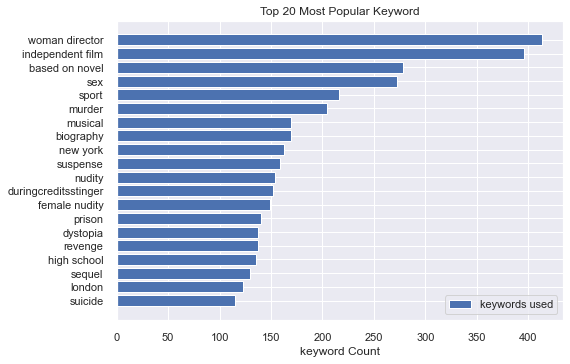

In [40]:
pop_keyword = sorted_df(df, 'keywords')
pop_keyword = pop_keyword[-20:]# Returns the top 20 keywords in the dataset
plt.barh(pop_keyword['keywords'], pop_keyword['count'], label = 'keywords used')

plt.title('Top 20 Most Popular Keyword')
plt.xlabel('keyword Count')
plt.legend()
plt.grid(True)
plt.show()

#### Report
From my observation keywords is just a subset of each genre that summarize what the movies is all about. Movies that have keywords like based on novel, biography can be grouped as one genres class. Movies having keywords like murder, suspense, prison, revenge, war, police, detective can be grouped as Action movies. Movies having keywords like musical, high school, friendship, holiday, father-son relationship, and love can be grouped as movies meant for the family. Having popular keywords in movie story lines might have some influence on the movies popularity.  

### Research Question 4 
### The Top 10 Most Popular Movie Production Comapanies

These are companies that have invested, producuded, or marketed movies that are the `df` data set. Popular movies production companies might have been making huge returns in investment and so they are able to produce movies to the wider audience.

In [41]:
# Returns a dictionary with the count of each comapany in the production companies column
pop_companies = sorted_df(df, 'production_companies')
pop_companies = pop_companies[-10:]

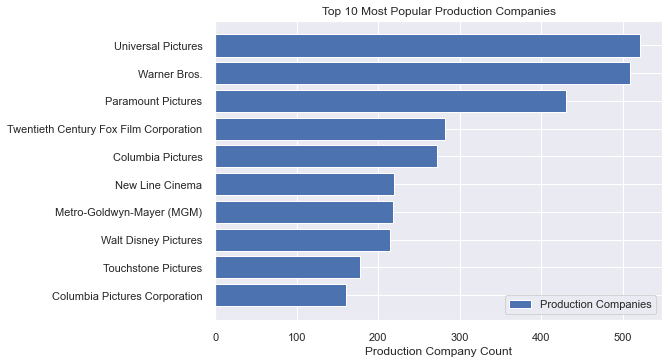

In [42]:
plt.barh(pop_companies['production_companies'], pop_companies['count'], label = 'Production Companies')

plt.title('Top 10 Most Popular Production Companies')
plt.xlabel('Production Company Count')
plt.legend()
plt.grid(True)
plt.show()

#### Report
I was not suprised when these famous movie production companies came up first. Movie companies like Walt Disney are well known for there animation movies, and so are the other top ten most popular movie production companies in the `df` data set.

### Research Question 5 
### What is  the Mean Profit of Movies for each Year?

This question was asked to find out if movie production is a profitable business over the years.

In [43]:
# Using Pandas group by object to group movies release year to the mean profit for each year.
meanprof_year = movies_df.groupby('release_year',as_index= False)['profit'].mean()

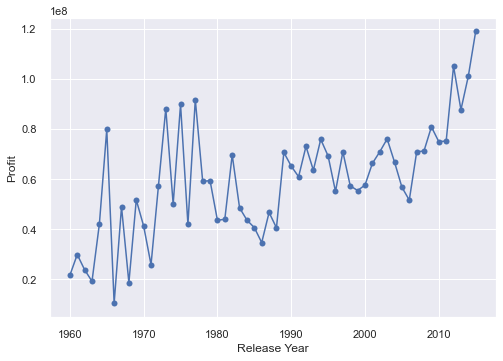

In [44]:
meanprof_year = meanprof_year.set_index('release_year')
plt.plot(meanprof_year['profit'], marker = 'o')

plt.xlabel('Release Year')
plt.ylabel('Profit')
plt.show();

From the Plot above we see a steady raise in profit as the years go by. To confirm this assumption let's plot the mean profit of each year using seaborn regression plot.

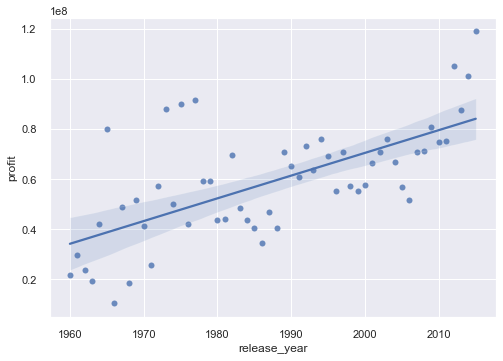

In [45]:
#Using a regression plot to check the relationship between profit and release year for each year in the data set
meanprof_year = meanprof_year.reset_index()
sns.regplot(x = meanprof_year['release_year'], y= meanprof_year['profit']);

#### Report
Notice that the mean profit for each year starting form 1960 to 2015 keeps on increasing. Our assumption are correct there is a positive increase as profit increases, release year also increases. What does this mean?, it means that the movies industry is growing industry and can bring positive returns if money is invested wisely.

### Research Question 6 
### Which movies have the highest profit between 1960 to 2015

In [46]:
high_profit = movies_df.query('profit_class == "high profit"')

In [47]:
high_prof10 = high_profit.sort_values(by = ['profit'], ascending = True)
high_prof10 = high_prof10[-10:]


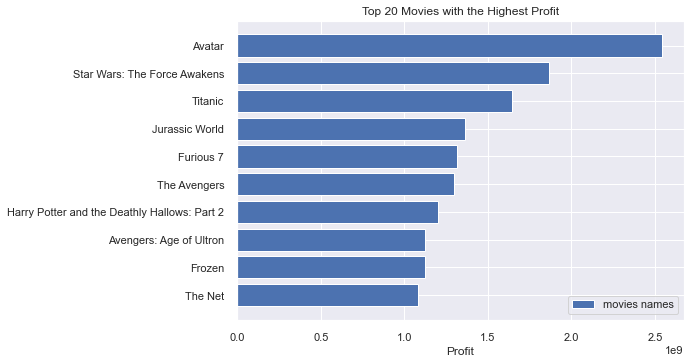

In [48]:
plt.barh(high_prof10['original_title'], high_prof10['profit'], label = 'movies names')

plt.title('Top 20 Movies with the Highest Profit')
plt.xlabel('Profit')
plt.legend()
plt.grid(True)
plt.show()

#### Report
Am not surpised since i have watched 7 out of the 10 movies seen in the visualization. These movies a popular and also produced by popular movies production companies. The genre of this movies include Action, science fiction, drama, and thriller.

### Research Question 7
### What is the Porfit Correlation for High Profit Movies?

The relationship between movies with high profit and other features is important. Therefore, we want to discover what relationship did profit have with other features such as budget and revenue in our dataset. 

### Visualization of the correlation of profit with other numeric features in the data set


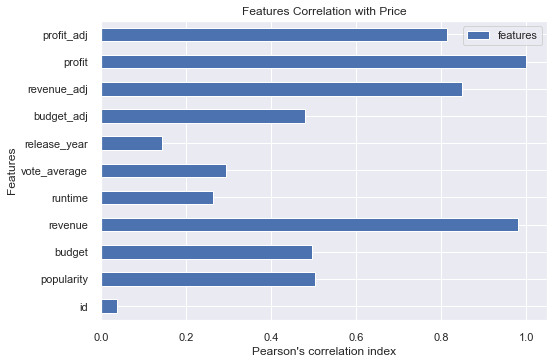

In [49]:
high_profit.corrwith(high_profit.profit).plot(kind='barh', label = 'features')
plt.title('Features Correlation with Price')
plt.xlabel('Pearson\'s correlation index')
plt.ylabel('Features')
plt.legend();

From our visualization of the correlation with profit, we can notice that popularity, budget, and revenue had a positive correlation with profit. We can make the assumption that high budget and popularity might have an influence successful movies.

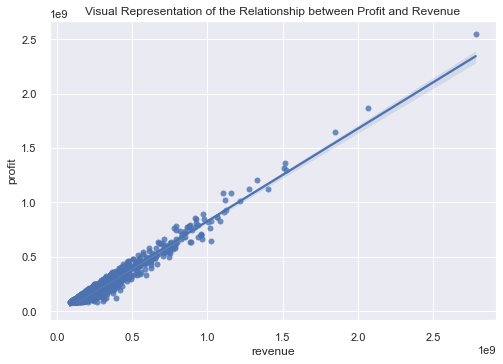

In [50]:
# Visualization of profit against revenue
sns.regplot(x = high_profit['revenue'], y = high_profit['profit'], marker = 'o')
plt.title('Visual Representation of the Relationship between Profit and Revenue');

From the visualization we can see that profit has a high correlation with revenue. This confirmes the earlier visualization we saw  Pearson's Correlation of Profit with Revenue which was about 0.98.

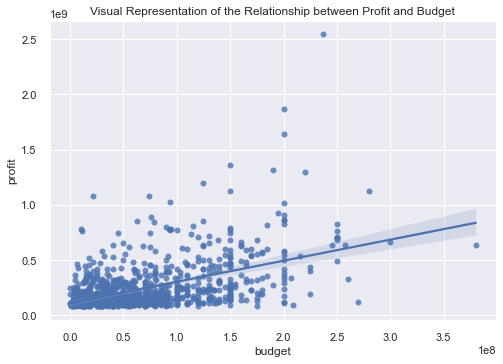

In [51]:
# Visualization of the relation between profit and budget
sns.regplot(x = high_profit['budget'], y = high_profit['profit'], marker = 'o')
plt.title('Visual Representation of the Relationship between Profit and Budget');

#### Report
From the visualization we can see that popularity, and budget had moderate positive correlation with profit. While revenue had a high correlation value. What does this mean for a poduction company wanting to invest in  movies
+ A movie with higher budget might have a better change of bring back positive returns.
+ Production Companies should work harder to increase the popularity of there movies by advertisment and adding popular figures to there cast and editorial team.


### Research Question 8
### Which movies made the least profit? 

In [52]:
# Returns the top 20 movies with the least profit
low_profit = movies_df.query('profit_class == "low profit"')
low_profit = low_profit.sort_values(by = ['profit'], ascending = False)
low_prof10 = low_profit[-10:]

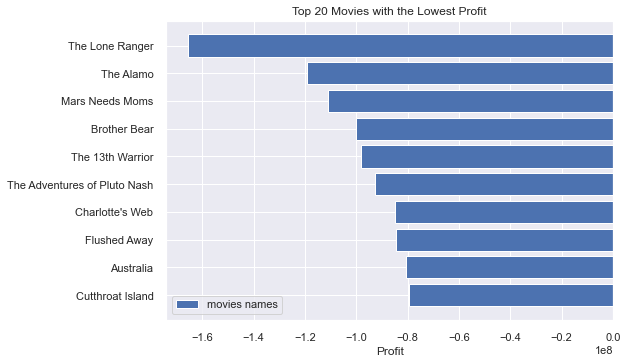

In [53]:
plt.barh(low_prof10['original_title'], low_prof10['profit'], label = 'movies names')
 
plt.title('Top 20 Movies with the Lowest Profit')
plt.xlabel('Profit')
plt.legend()
plt.grid(True)
plt.show()

#### Report
Suprisely some of these movies are popular for been failures despite the cast, and investments in these movies. Among the movies mentioned above i have watched only one The Adventures of Pluto Nash, these movie feature a popular actor and had a considerable amount in budget to perform well, but suprisely failed to make profit.

### Research Question 9
### What is the Porfit Correlation for Low Profit Movies?

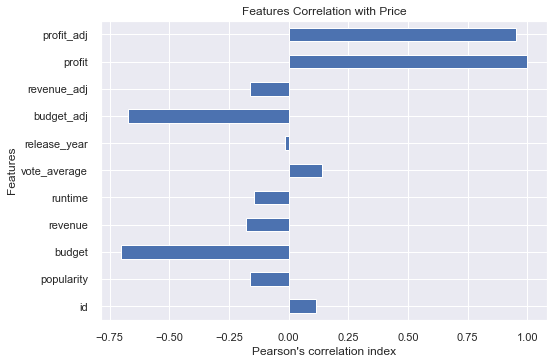

In [54]:
# Visualization of the correlation of profit with other numeric features in the data set
low_profit.corrwith(low_profit.profit).plot(kind='barh')
plt.title('Features Correlation with Price')
plt.xlabel('Pearson\'s correlation index')
plt.ylabel('Features');

From the visualization we can see that majority of our features had negative correlation with profit, with budget having the highest negative correlation.

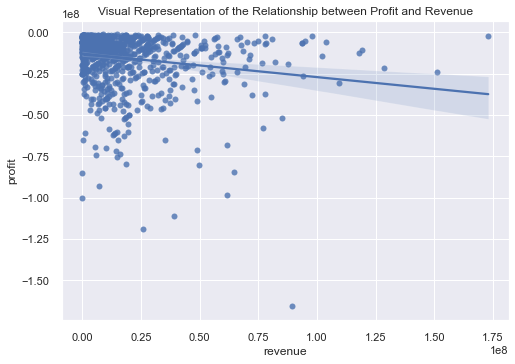

In [55]:
# Visualization of the relation between profit and revenue
sns.regplot(x = low_profit['revenue'], y = low_profit['profit'], marker = 'o')
plt.title('Visual Representation of the Relationship between Profit and Revenue');

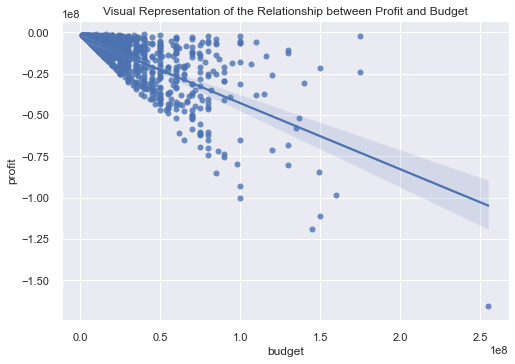

In [56]:
# Visualization of the relation between profit and budget
sns.regplot(x = low_profit['budget'], y = low_profit['profit'], marker = 'o')
plt.title('Visual Representation of the Relationship between Profit and Budget');

#### Report
We can notice that almost all the features had negative correlation with profit of low profit movies. What does this mean?, it harder to make assumptions on which movies would fail which is very important to production companies. Correlation only shows the relationship between two features but those not show the what causes the movies to fail.

### Research Question 10
### Which Features Had the Greatest Impact on the Profit of movies

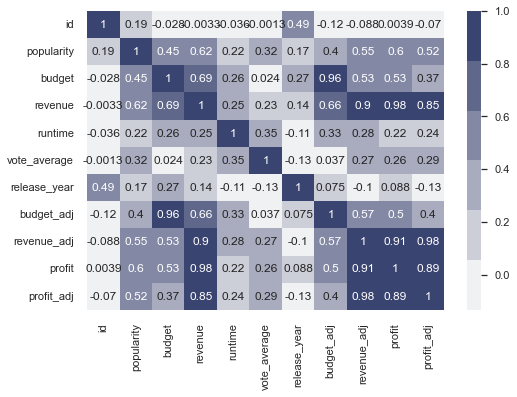

In [57]:
# Retruns a seaborn heatmap plot of the correlation of the data set
movies_corr = movies_df.corr()
cmap = sns.light_palette((260, 45, 30), input="husl")
sns.heatmap(movies_corr, annot = True, cmap = cmap);

#### Report
From the correlation heatmap plot:
+ popularity and budget had a positive correlation.
+ revenue and profit had a positive correlation.
+ popularity and revenue also had a positive correlation.
+ revenue and budget had positive correlation.
+ Features like runtime, release year, and vote average had little correlation with other features.

<a id='conclusions'></a>
## Conclusion

We have seen  visualization of succesful and unsuccesful movies, popular production companies, popular genres, and finally popular keywords used in movies. So what insights can be drawn from the data set, To answer this let's look at some visualization of budget, revenue, and popularity. Comparing this two classes of movies might offer use better insights. 

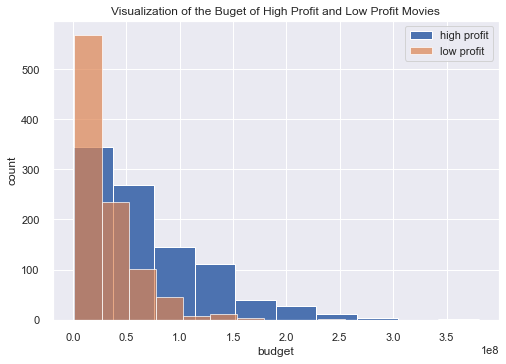

In [58]:
plt.hist(high_profit.budget, label = 'high profit')
plt.hist(low_profit.budget, alpha = 0.7, label = 'low profit')

plt.title('Visualization of the Buget of High Profit and Low Profit Movies')
plt.xlabel('budget')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.show()

#### Report
From the visualization we can say that movies with high profit have higher budget than low profit movies within our dataset.

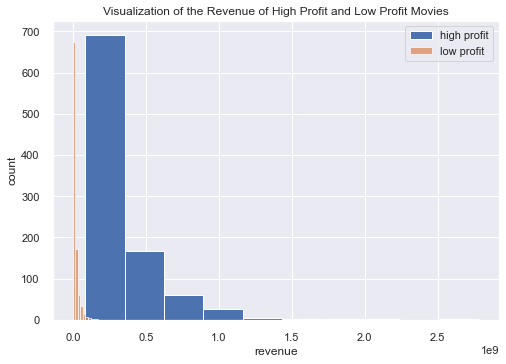

In [59]:
plt.hist(high_profit.revenue, label = 'high profit')
plt.hist(low_profit.revenue, alpha = 0.7, label = 'low profit')

plt.title('Visualization of the Revenue of High Profit and Low Profit Movies')
plt.xlabel('revenue')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.show()

#### Report
From the visualization we can affirm that movies with high profit make far higher revenue than low profit movies. 

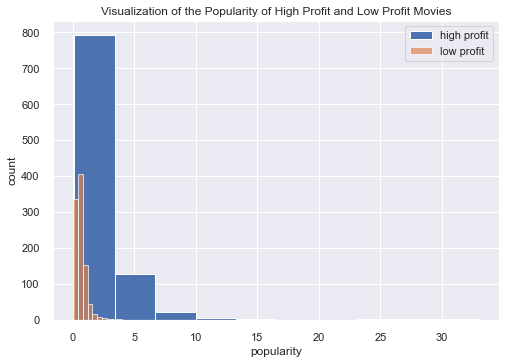

In [60]:
plt.hist(high_profit.popularity, label = 'high profit')
plt.hist(low_profit.popularity, alpha = 0.7, label = 'low profit')

plt.title('Visualization of the Popularity of High Profit and Low Profit Movies')
plt.xlabel('popularity')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.show()

#### Report
From the visualization we can affirm that movies with high profit movies are more popular than movies with low profit in the `movies_df` dataset.

In [61]:
# Created variables that store the statistical description of the original , high profit, and low profit dataset
movies_summ = movies_df.describe()
high_summ = high_profit.describe()
low_summ = low_profit.describe()

In [62]:
# Droping irrelevant columns for the analysis summary
high_summ = high_summ.drop(['id','release_year', 'budget_adj', 'revenue_adj','profit_adj'], axis = 1)
low_summ = low_summ.drop(['id','release_year', 'budget_adj', 'revenue_adj','profit_adj'], axis = 1)
movies_summ = movies_summ .drop(['id','release_year', 'budget_adj', 'revenue_adj','profit_adj'], axis = 1)

In [63]:
movies_summ

,popularity,budget,revenue,runtime,vote_average,profit
count,3853.000000,3.853000e+03,3.853000e+03,3853.000000,3853.000000,3.853000e+03
mean,1.191825,3.721227e+07,1.077117e+08,109.208928,6.168258,7.049944e+07
std,1.475258,4.221035e+07,1.765554e+08,19.912913,0.795001,1.506356e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,2.200000,-4.139124e+08
25%,0.462609,1.000000e+07,1.360940e+07,95.000000,5.700000,-1.324619e+06
50%,0.797723,2.400000e+07,4.480678e+07,106.000000,6.200000,2.003320e+07
75%,1.368403,5.000000e+07,1.242721e+08,119.000000,6.700000,8.172336e+07
max,32.985763,4.250000e+08,2.781506e+09,338.000000,8.400000,2.544506e+09


In [64]:
high_summ

,popularity,budget,revenue,runtime,vote_average,profit
count,952.000000,9.520000e+02,9.520000e+02,952.000000,952.000000,9.520000e+02
mean,2.302216,7.003274e+07,3.171813e+08,115.193277,6.448004,2.471486e+08
std,2.341025,5.690448e+07,2.515021e+08,21.235212,0.702090,2.183218e+08
min,0.131526,1.130000e+02,8.627333e+07,72.000000,4.400000,8.347333e+07
25%,1.105595,2.675000e+07,1.609097e+08,99.000000,6.000000,1.155102e+08
50%,1.696765,5.500000e+07,2.329035e+08,113.000000,6.400000,1.670000e+08
75%,2.712702,1.000000e+08,3.688722e+08,128.000000,7.000000,2.916305e+08
max,32.985763,3.800000e+08,2.781506e+09,201.000000,8.300000,2.544506e+09


In [65]:
low_summ

,popularity,budget,revenue,runtime,vote_average,profit
count,971.000000,9.710000e+02,9.710000e+02,971.000000,971.000000,9.710000e+02
mean,0.632600,3.105909e+07,1.591636e+07,107.341916,5.839135,-1.514273e+07
std,0.456320,2.836104e+07,2.055419e+07,19.225962,0.777793,1.620001e+07
min,0.015997,1.500000e+06,2.000000e+00,63.000000,2.200000,-1.657101e+08
25%,0.345917,1.150000e+07,2.022124e+06,95.000000,5.300000,-1.969502e+07
50%,0.533880,2.300000e+07,9.494789e+06,104.000000,5.900000,-9.961939e+06
75%,0.791063,4.000000e+07,2.029930e+07,116.000000,6.400000,-4.971925e+06
max,3.990488,2.550000e+08,1.730000e+08,338.000000,8.000000,-1.177654e+06


### Summary Statistics of High and Low Profit Movies Compared to the Original Dataset



| Column Name| Original Dataset | High Profit |Low Profit|
|-|-|-|-|
|Popularity |The popularity ranged from 0.010335 to 32.985763| High profit movies had a mean and median that performed well above the 75th percentile of the original movies dataset. In summary high profit movies are more popular than low profit movies.|Low Profit movies had a mean and median below the 75th percentile popularity in the original movies dataset         |
|Budget         | Budget ranged from 1 to 420 million| High Profit movies had slightly higher  budget than low profit movies, with bugdet far exceeding the 75th percentile of the original budget | From the summary statistics we can see that budget had little to do with difference in profit of this two classes of movies          |
revenue         | The original dataset had revenue ranging from 2 to 2.7 billion        |High Profit movies had the highest revenue recorded in the dataset  | Low budget movies had the least revenue despite having a high budget range|
|Runtime         | The original dataset had runtime rnaging from 15 minutes to 338 minutes        |High Profit had a mean and median value of 115 and 75, which is below the 50th percentile of movies runtime in our original dataset. compared to low profit movies, high profit had runtime slightly lower than low profit movies |Low profit movies had a mean and median value of 107 and 104. low profit movies had runtime in the 50th percentile|
|Vote Average| The Original dataset had a vote average ranging from 2.2 to 8.4| High Profit movies had a mean and median values of 6.44 and 6.40, which is the 50th Percentile in the original dataset. Compare to low profit movies, high profit movies performed better than low profit movies| Low profit movies had mean and median values of 5.84 and 5.9, which is below the 50 th percentile in the original dataset|
|Profit| The Original dataset had a profit ranging from a profit loss of 400 million to a profit gain of 2.5 billion| High profit movies had the highest profit margin with a range of 83 million and 2.5 billion gain in profit| Low profit movies had the least profit with losses ranging from 1.2 million to 166 million.|


### Non Numeric Summary

**Most Popular Genre includes:**
+ Drama
+ Comedy
+ Thriller
+ Action
+ Romance
+ Horror

**Production Companies involved in High budget movies, High Revenue, and are popular are:**
+ Universal Pictures
+ Warner Bros
+ Paramount Pictures
+ 20th Century Fox
+ Columbia Pictures
+ Walt Disney
+ Dream Works

**Production Companies with high Profit Margin:**
+ Warner Bros
+ Pixar Studios
+ Walt Disney
+ Marvel Studios
+ 20th Century Fox

All the production companies stated above having high budget, revenue, and are popular all had movies that failed. This shows that high budget does not neccesary influence the revenue of movies, but is a key factor to some successful movies.

### Project Limitation

Columns like cast, tagline, homepage, overview, and vote_count where not explored in this project which might have improve the quality of the data analysis. The project did not make any predictions, but only use simple statistical analysis to make assumptions.